In [1]:
%pylab inline
import numpy as np #импорт библиотеки для работы с массивами
import pandas as pd #импорт библиотеки для работы с данными

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
#считываем данные
data = pd.read_csv(r'dataset for task-lesson2.csv',encoding='latin-1',sep=";")

In [5]:
#оставляем только тех кто получил карту
data=data[data['issued']==1]
data=data.drop('issued',1)

In [6]:
data.head()

,date of birth,age,sex,account,id,active,payroll,segment
0,08.09.1940,76,Female,Long life deposit,01-0102-D-77792953,0,0,Retired
1,21.11.1967,49,Male,Long life deposit,01-0102-D-77789599,0,0,Workers
2,26.08.1958,58,Female,Long life deposit,01-0165-D-77799637,0,0,Retired
3,23.07.1951,65,Female,Long life deposit,01-0165-D-77796328,0,0,Retired
4,11.09.1954,62,Female,Long life deposit,01-0102-D-77797635,0,1,Retired


In [7]:
len(data)

5783

*Смотрим уникальные аккаунты*

In [8]:
data['account'].value_counts()

ABB individuals       3029
Salary                2522
Long life deposit      163
Salary 6%               40
Salary 3%               21
001-Âêëàä Ñóáñèäèÿ       8
Name: account, dtype: int64

*Удаляем ненужные классы*

In [9]:
data = data[data['account']!='001-Âêëàä Ñóáñèäèÿ']

In [10]:
len(data)

5775

In [11]:
data['sex'].value_counts()

Female    4261
Male      1513
0            1
Name: sex, dtype: int64

In [12]:

data=data[data['sex']!='0']

In [13]:
len(data)

5774

*Строим график по возрастам*

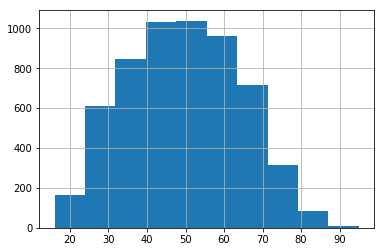

In [14]:
data['age'].hist()

**Подготовка данных**

**sex:** 0 - Male, 1 - Female

**account:** 0 - Long life deposit, 1 - Salary 6%	

**segment:** 0 - Workers, 1 - Retired

In [15]:
def to_sex(x):
    if x== 'Male':
        return 0;
    else:
        return 1;
data['sex']=data['sex'].apply(to_sex)
def to_account(x1):
    if x1== 'ABB individuals':
        return 0;
    else:
        return 1;
data['account']=data['account'].apply(to_account)
def to_segment(x2):
    if x2== 'Workers':
        return 0;
    else:
        return 1;
data['segment']=data['segment'].apply(to_segment)

In [16]:
data.head()

,date of birth,age,sex,account,id,active,payroll,segment
0,08.09.1940,76,1,1,01-0102-D-77792953,0,0,1
1,21.11.1967,49,0,1,01-0102-D-77789599,0,0,0
2,26.08.1958,58,1,1,01-0165-D-77799637,0,0,1
3,23.07.1951,65,1,1,01-0165-D-77796328,0,0,1
4,11.09.1954,62,1,1,01-0102-D-77797635,0,1,1


In [17]:
data['18-34']=data.age.apply(lambda x:1 if x<35 else 0)
data['35-54']=data.age.apply(lambda x:1 if x>=35 and x<55 else 0)
data['55+']=data.age.apply(lambda x:1 if x>=55 else 0)

In [18]:
data.head()

,date of birth,age,sex,account,id,active,payroll,segment,18-34,35-54,55+
0,08.09.1940,76,1,1,01-0102-D-77792953,0,0,1,0,0,1
1,21.11.1967,49,0,1,01-0102-D-77789599,0,0,0,0,1,0
2,26.08.1958,58,1,1,01-0165-D-77799637,0,0,1,0,0,1
3,23.07.1951,65,1,1,01-0165-D-77796328,0,0,1,0,0,1
4,11.09.1954,62,1,1,01-0102-D-77797635,0,1,1,0,0,1


*Сравнение количества мужчин и женщин*

Text(0.5,1,"Clients' sex distribution")

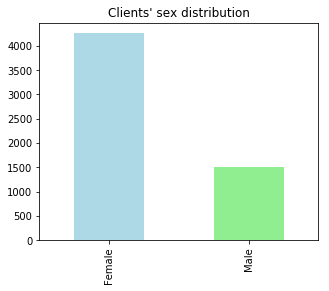

In [19]:
data.sex.value_counts().plot(kind='bar',color=['lightblue','lightgreen'],figsize=(5,4))
xticks([1,0],['Male','Female'])
title('Clients\' sex distribution')

In [20]:
data.active.value_counts()

0    4959
1     815
Name: active, dtype: int64

Text(0.5,1,"Clients' activity distribution")

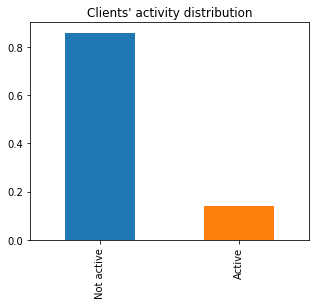

In [21]:
data.active.value_counts(normalize=True).plot(kind='bar', figsize=(5,4)) #, color=['lightblue', 'lightgreen']
xticks([1, 0], ['Active', 'Not active'])
title('Clients\' activity distribution')

*Описание класса*

In [22]:
data.age.describe()

count    5774.000000
mean       49.438517
std        15.005096
min        16.000000
25%        38.000000
50%        49.000000
75%        61.000000
max        95.000000
Name: age, dtype: float64

In [23]:
y=data['active']
X=data[['active','age','18-34','35-54','55+','sex','account','payroll','segment']]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

**Увеличим количество обьектов миноритарного класс в train set(oversampling)**

In [25]:

def oversample(x_train1,x_test):
    x_train=x_train1
    
    x_train=x_train.append(x_train1[x_train1['active']==1])
    x_train=x_train.append(x_train1[x_train1['active']==1])
    
    x_train=x_train.sample(frac=1).reset_index(drop=True)
    y_train=x_train['active']
    x_train=x_train.drop('active',1)
    x_test=x_test.drop('active',1)
    return x_train,y_train,x_test
x_train,y_train,x_test=oversample(x_train,x_test)

**Обучаем модель**

In [26]:

def check_models(feature_sets,models):
    i=0
    for f in feature_sets:
        print(i)
        x=data[f]
        y=data['active']
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=48)
        x_train,y_train,x_test=oversample(x_train,x_test)
        for m in models:
            m.fit(x_train,y_train)
            predicted=m.predict(x_test)
            print(m)
            print(metrics.accuracy_score(y_test,predicted,normalize=True))
            print(metrics.confusion_matrix(y_test,predicted))
    i+=1

*Берем рандомные классификаторы и прогоняем через них модель*

In [27]:
feature_sets=[]
feature_sets.append(['sex', 'account','active', 'payroll','segment', '18-34', '35-54', '55+'])
feature_sets.append(['sex', 'account','active', 'payroll','segment', '18-34', '35-54', '55+'])
models = []
models.append(KNeighborsClassifier(n_neighbors=10))
models.append(DecisionTreeClassifier())
models.append(SVC())
models.append(SGDClassifier())

In [28]:
check_models(feature_sets,models)

0
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
0.8373557187827911
[[1558   88]
 [ 222   38]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.829485834207765
[[1545  101]
 [ 224   36]]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8284365162644282
[[1538  108]
 [ 219   41]]
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8284365162644282
[[1538  108]
 [ 219   41]]
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.8116474291710388
[[1495  151]
 [ 208   52]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


**Оптимизация параметров модели**

**LogisticRegression**

In [29]:
#смотрим как улучшить результат работы
y=data['active']
X=data[['active','age','18-34','35-54','55+','sex','account','payroll','segment']]
X,y,_ = oversample(X,data[['active','age']])


In [30]:
param_grid = [{'penalty':['l1', 'l2'],
               'C':[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 1.2],
               'tol':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 0.5, 2]}]

grid = GridSearchCV(LogisticRegression(), param_grid, scoring='roc_auc', verbose=2)

In [31]:
grd=grid.fit(X,y)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] C=0.0001, penalty=l1, tol=1e-05 .................................
[CV] ........................ C=0.0001, penalty=l1, tol=1e-05 -   0.0s
[CV] C=0.0001, penalty=l1, tol=1e-05 .................................
[CV] ........................ C=0.0001, penalty=l1, tol=1e-05 -   0.0s
[CV] C=0.0001, penalty=l1, tol=1e-05 .................................
[CV] ........................ C=0.0001, penalty=l1, tol=1e-05 -   0.0s
[CV] C=0.0001, penalty=l1, tol=0.0001 ................................
[CV] ....................... C=0.0001, penalty=l1, tol=0.0001 -   0.0s
[CV] C=0.0001, penalty=l1, tol=0.0001 ................................
[CV] ....................... C=0.0001, penalty=l1, tol=0.0001 -   0.0s
[CV] C=0.0001, penalty=l1, tol=0.0001 ................................
[CV] ....................... C=0.0001, penalty=l1, tol=0.0001 -   0.0s
[CV] C=0.0001, penalty=l1, tol=0.001 .................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.0001, penalty=l1, tol=0.1 ...................................
[CV] .......................... C=0.0001, penalty=l1, tol=0.1 -   0.0s
[CV] C=0.0001, penalty=l1, tol=0.1 ...................................
[CV] .......................... C=0.0001, penalty=l1, tol=0.1 -   0.0s
[CV] C=0.0001, penalty=l1, tol=0.1 ...................................
[CV] .......................... C=0.0001, penalty=l1, tol=0.1 -   0.0s
[CV] C=0.0001, penalty=l1, tol=1 .....................................
[CV] ............................ C=0.0001, penalty=l1, tol=1 -   0.0s
[CV] C=0.0001, penalty=l1, tol=1 .....................................
[CV] ............................ C=0.0001, penalty=l1, tol=1 -   0.0s
[CV] C=0.0001, penalty=l1, tol=1 .....................................
[CV] ............................ C=0.0001, penalty=l1, tol=1 -   0.0s
[CV] C=0.0001, penalty=l1, tol=0.5 ...................................
[CV] .......................... C=0.0001, penalty=l1, tol=0.5 -   0.0s
[CV] C

[CV] ......................... C=0.001, penalty=l2, tol=1e-05 -   0.0s
[CV] C=0.001, penalty=l2, tol=0.0001 .................................
[CV] ........................ C=0.001, penalty=l2, tol=0.0001 -   0.0s
[CV] C=0.001, penalty=l2, tol=0.0001 .................................
[CV] ........................ C=0.001, penalty=l2, tol=0.0001 -   0.0s
[CV] C=0.001, penalty=l2, tol=0.0001 .................................
[CV] ........................ C=0.001, penalty=l2, tol=0.0001 -   0.0s
[CV] C=0.001, penalty=l2, tol=0.001 ..................................
[CV] ......................... C=0.001, penalty=l2, tol=0.001 -   0.0s
[CV] C=0.001, penalty=l2, tol=0.001 ..................................
[CV] ......................... C=0.001, penalty=l2, tol=0.001 -   0.0s
[CV] C=0.001, penalty=l2, tol=0.001 ..................................
[CV] ......................... C=0.001, penalty=l2, tol=0.001 -   0.0s
[CV] C=0.001, penalty=l2, tol=0.01 ...................................
[CV] .

[CV] ............................ C=0.01, penalty=l2, tol=0.5 -   0.0s
[CV] C=0.01, penalty=l2, tol=0.5 .....................................
[CV] ............................ C=0.01, penalty=l2, tol=0.5 -   0.0s
[CV] C=0.01, penalty=l2, tol=0.5 .....................................
[CV] ............................ C=0.01, penalty=l2, tol=0.5 -   0.0s
[CV] C=0.01, penalty=l2, tol=2 .......................................
[CV] .............................. C=0.01, penalty=l2, tol=2 -   0.0s
[CV] C=0.01, penalty=l2, tol=2 .......................................
[CV] .............................. C=0.01, penalty=l2, tol=2 -   0.0s
[CV] C=0.01, penalty=l2, tol=2 .......................................
[CV] .............................. C=0.01, penalty=l2, tol=2 -   0.0s
[CV] C=0.1, penalty=l1, tol=1e-05 ....................................
[CV] ........................... C=0.1, penalty=l1, tol=1e-05 -   0.0s
[CV] C=0.1, penalty=l1, tol=1e-05 ....................................
[CV] .

[CV] ........................... C=0.5, penalty=l1, tol=0.001 -   0.0s
[CV] C=0.5, penalty=l1, tol=0.001 ....................................
[CV] ........................... C=0.5, penalty=l1, tol=0.001 -   0.0s
[CV] C=0.5, penalty=l1, tol=0.01 .....................................
[CV] ............................ C=0.5, penalty=l1, tol=0.01 -   0.0s
[CV] C=0.5, penalty=l1, tol=0.01 .....................................
[CV] ............................ C=0.5, penalty=l1, tol=0.01 -   0.0s
[CV] C=0.5, penalty=l1, tol=0.01 .....................................
[CV] ............................ C=0.5, penalty=l1, tol=0.01 -   0.0s
[CV] C=0.5, penalty=l1, tol=0.1 ......................................
[CV] ............................. C=0.5, penalty=l1, tol=0.1 -   0.0s
[CV] C=0.5, penalty=l1, tol=0.1 ......................................
[CV] ............................. C=0.5, penalty=l1, tol=0.1 -   0.0s
[CV] C=0.5, penalty=l1, tol=0.1 ......................................
[CV] .

[CV] ................................. C=1, penalty=l1, tol=2 -   0.0s
[CV] C=1, penalty=l1, tol=2 ..........................................
[CV] ................................. C=1, penalty=l1, tol=2 -   0.0s
[CV] C=1, penalty=l1, tol=2 ..........................................
[CV] ................................. C=1, penalty=l1, tol=2 -   0.0s
[CV] C=1, penalty=l2, tol=1e-05 ......................................
[CV] ............................. C=1, penalty=l2, tol=1e-05 -   0.0s
[CV] C=1, penalty=l2, tol=1e-05 ......................................
[CV] ............................. C=1, penalty=l2, tol=1e-05 -   0.0s
[CV] C=1, penalty=l2, tol=1e-05 ......................................
[CV] ............................. C=1, penalty=l2, tol=1e-05 -   0.0s
[CV] C=1, penalty=l2, tol=0.0001 .....................................
[CV] ............................ C=1, penalty=l2, tol=0.0001 -   0.0s
[CV] C=1, penalty=l2, tol=0.0001 .....................................
[CV] .

[CV] ............................ C=1.2, penalty=l2, tol=0.01 -   0.0s
[CV] C=1.2, penalty=l2, tol=0.1 ......................................
[CV] ............................. C=1.2, penalty=l2, tol=0.1 -   0.0s
[CV] C=1.2, penalty=l2, tol=0.1 ......................................
[CV] ............................. C=1.2, penalty=l2, tol=0.1 -   0.0s
[CV] C=1.2, penalty=l2, tol=0.1 ......................................
[CV] ............................. C=1.2, penalty=l2, tol=0.1 -   0.0s
[CV] C=1.2, penalty=l2, tol=1 ........................................
[CV] ............................... C=1.2, penalty=l2, tol=1 -   0.0s
[CV] C=1.2, penalty=l2, tol=1 ........................................
[CV] ............................... C=1.2, penalty=l2, tol=1 -   0.0s
[CV] C=1.2, penalty=l2, tol=1 ........................................
[CV] ............................... C=1.2, penalty=l2, tol=1 -   0.0s
[CV] C=1.2, penalty=l2, tol=0.5 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:    5.1s finished


In [32]:
grd.best_params_

{'C': 1, 'penalty': 'l1', 'tol': 1e-05}

In [33]:
est=grd.best_estimator_

In [34]:
y=data['active']
X=data[['active','age','18-34','35-54','55+','sex','account','payroll','segment']]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [35]:
x_train,y_train,x_test=oversample(x_train,x_test)

In [36]:
est.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-05,
          verbose=0, warm_start=False)

In [37]:
pred=est.predict(x_test)

In [38]:
print(metrics.accuracy_score(y_test,pred,normalize=False),'/',len(y_test))
print(metrics.accuracy_score(y_test,pred,normalize=True))
print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))

1558 / 1906
0.8174186778593914
[[1508  109]
 [ 239   50]]
             precision    recall  f1-score   support

          0       0.86      0.93      0.90      1617
          1       0.31      0.17      0.22       289

avg / total       0.78      0.82      0.79      1906

